In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.model_selection import train_test_split
import time
import os
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

### Upload Dataset

##### Dataset GitHub Page: github.com/ardamavi/Sign-Language-Digits-Dataset

#### Details of datasets:
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10

In [3]:
X=np.load(r'sign-language-digits-dataset\X.npy')
Y=np.load(r'sign-language-digits-dataset\Y.npy')

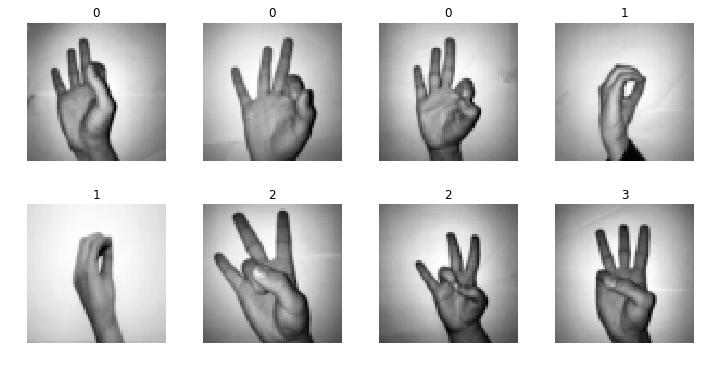

In [4]:
plt.figure(figsize=(10,10))
for i in range(0, 8):
    plt.subplot(440 + 1 + i)
    plt.tight_layout()
    plt.imshow(X[i*100], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(Y[i*100].argmax())    
plt.show()

In [5]:
X.shape

(2062, 64, 64)

In [6]:
Y.shape

(2062, 10)

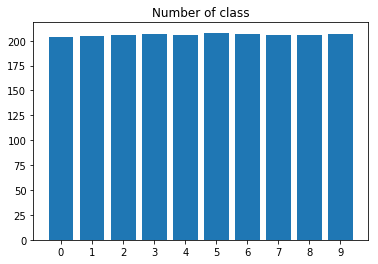

In [7]:
num_class = np.unique(Y.argmax(axis=1), return_counts=True) 
plt.title("Number of class")
plt.xticks(num_class[0])
plt.bar(num_class[0], num_class[1],color = (0.2, 0.4, 0.6, 0.6) )
plt.show()

### Train-Test Split
Lets split X and Y into train and test sets.

In [8]:
X_flat = np.array(X).reshape((-1, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [9]:
X_flat.shape

(2062, 4096)

#### Principle Componenet Analysis (PCA)
* Pca is a dimension reduction method to better analyze data

In [10]:
from sklearn.decomposition import PCA
pca_dims = PCA()
pca_dims.fit(X_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

316

In [11]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_flat)
X_recovered = pca.inverse_transform(X_reduced)

In [12]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (2062, 316)
recovered shape: (2062, 4096)


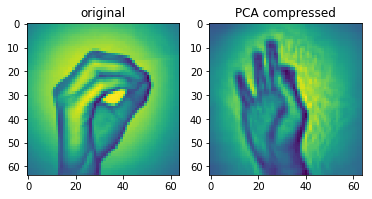

In [13]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)


In [14]:
X_recovered

array([[0.45184967, 0.46050692, 0.46829227, ..., 0.536699  , 0.526687  ,
        0.5155766 ],
       [0.59241277, 0.6013395 , 0.61351496, ..., 0.3953687 , 0.39425927,
        0.38807365],
       [0.5831711 , 0.59590656, 0.6070859 , ..., 0.40379465, 0.39859393,
        0.39011374],
       ...,
       [0.51612204, 0.53397834, 0.5425608 , ..., 0.4633479 , 0.46093452,
        0.45297477],
       [0.49651745, 0.50737596, 0.51752084, ..., 0.5406857 , 0.52719223,
        0.51560235],
       [0.9064405 , 0.91425073, 0.92247623, ..., 0.70479614, 0.70581007,
        0.6929464 ]], dtype=float32)

In [15]:
X = X.reshape(-1, 64, 64, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

In [16]:
X_train.shape

(1649, 64, 64, 1)

In [17]:
y_train.shape

(1649, 10)

Gray-scale

In [18]:
X_train = X_train /255
X_test = X_test/255

In [19]:
X_test

array([[[[0.00198385],
         [0.00201461],
         [0.00202999],
         ...,
         [0.00189158],
         [0.0018762 ],
         [0.00183007]],

        [[0.00201461],
         [0.00204537],
         [0.00207612],
         ...,
         [0.00192234],
         [0.00190696],
         [0.00186082]],

        [[0.00204537],
         [0.0020915 ],
         [0.00212226],
         ...,
         [0.00196847],
         [0.00193772],
         [0.00189158]],

        ...,

        [[0.0018762 ],
         [0.00192234],
         [0.00195309],
         ...,
         [0.00184544],
         [0.00181469],
         [0.00178393]],

        [[0.00183007],
         [0.0018762 ],
         [0.00190696],
         ...,
         [0.00178393],
         [0.00176855],
         [0.00172241]],

        [[0.00179931],
         [0.00184544],
         [0.00186082],
         ...,
         [0.00169166],
         [0.0016609 ],
         [0.00159938]]],


       [[[0.00213764],
         [0.00218378],
         [0.00

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Convolution2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


### Create Model

In [21]:
import keras
from keras import layers,models
from keras.layers import BatchNormalization

from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense,Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD, RMSprop, Adam

In [22]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(68, (5, 5), input_shape = (64, 64, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(68, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(68, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# Generate Images
train_datagen = ImageDataGenerator(
                                   shear_range = 0.08,
                                   zoom_range = 0.08,
                                   horizontal_flip = False,
                                   width_shift_range= 0.02,
                                   height_shift_range= 0.02)
test_datagen = ImageDataGenerator(rescale = 1./255)

# fit parameters from data
training_set = train_datagen.flow(X_train, y_train, batch_size=64)
test_set = test_datagen.flow(X_test, y_test, batch_size=64)

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs =10,
                         validation_data = test_set,
                         validation_steps = 500)

Epoch 1/10
50/50 [==============================] - 229s 5s/step - loss: 0.0084 - acc: 0.9977 - val_loss: 1.2878 - val_acc: 0.8199
Epoch 2/10
50/50 [==============================] - 226s 5s/step - loss: 0.0088 - acc: 0.9977 - val_loss: 1.1055 - val_acc: 0.9000
Epoch 3/10
50/50 [==============================] - 225s 5s/step - loss: 0.0076 - acc: 0.9982 - val_loss: 2.3839 - val_acc: 0.8199
Epoch 4/10
50/50 [==============================] - 229s 5s/step - loss: 0.0077 - acc: 0.9983 - val_loss: 1.3456 - val_acc: 0.8203
Epoch 5/10
50/50 [==============================] - 222s 4s/step - loss: 0.0079 - acc: 0.9977 - val_loss: 1.2853 - val_acc: 0.8199
Epoch 6/10
50/50 [==============================] - 223s 4s/step - loss: 0.0055 - acc: 0.9987 - val_loss: 1.5612 - val_acc: 0.8203
Epoch 7/10
50/50 [==============================] - 223s 4s/step - loss: 0.0052 - acc: 0.9991 - val_loss: 1.2954 - val_acc: 0.8199
Epoch 8/10
50/50 [==============================] - 232s 5s/step - loss: 0.0060 - a

In [29]:
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("{}: {:.2f}%".format(classifier.metrics_names[1], scores[1]*100))

acc: 96.25%


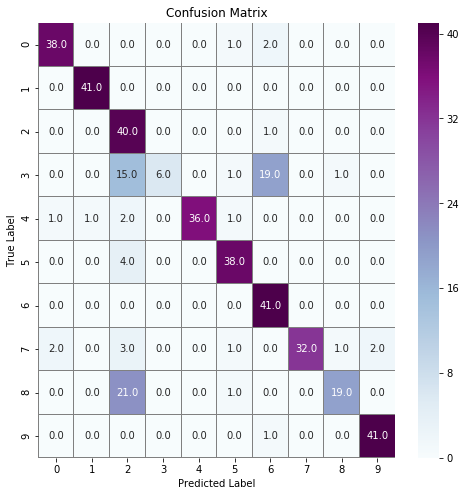

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 
# Predict the values from the validation dataset
Y_pred = classifier.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

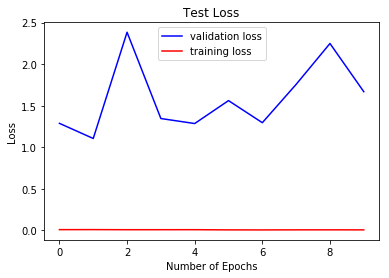

In [32]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="training loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

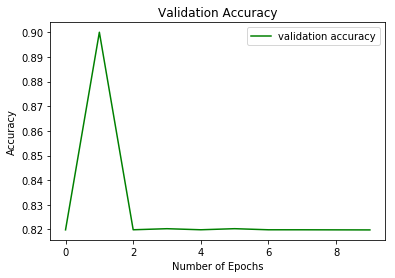

In [33]:
# Plot the accuracy curve for validation 
plt.plot(history.history['val_acc'], color='g', label="validation accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()